### Library and basic functions

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [90]:

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image

def read_image(filepath):
    img_bgr = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img_rgb

def write_image(image, filepath):
    img_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(filepath, img_bgr)

def show_image(image, title=None, cmap_type=None):
    plt.imshow(image, cmap=cmap_type)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()


### 2.1

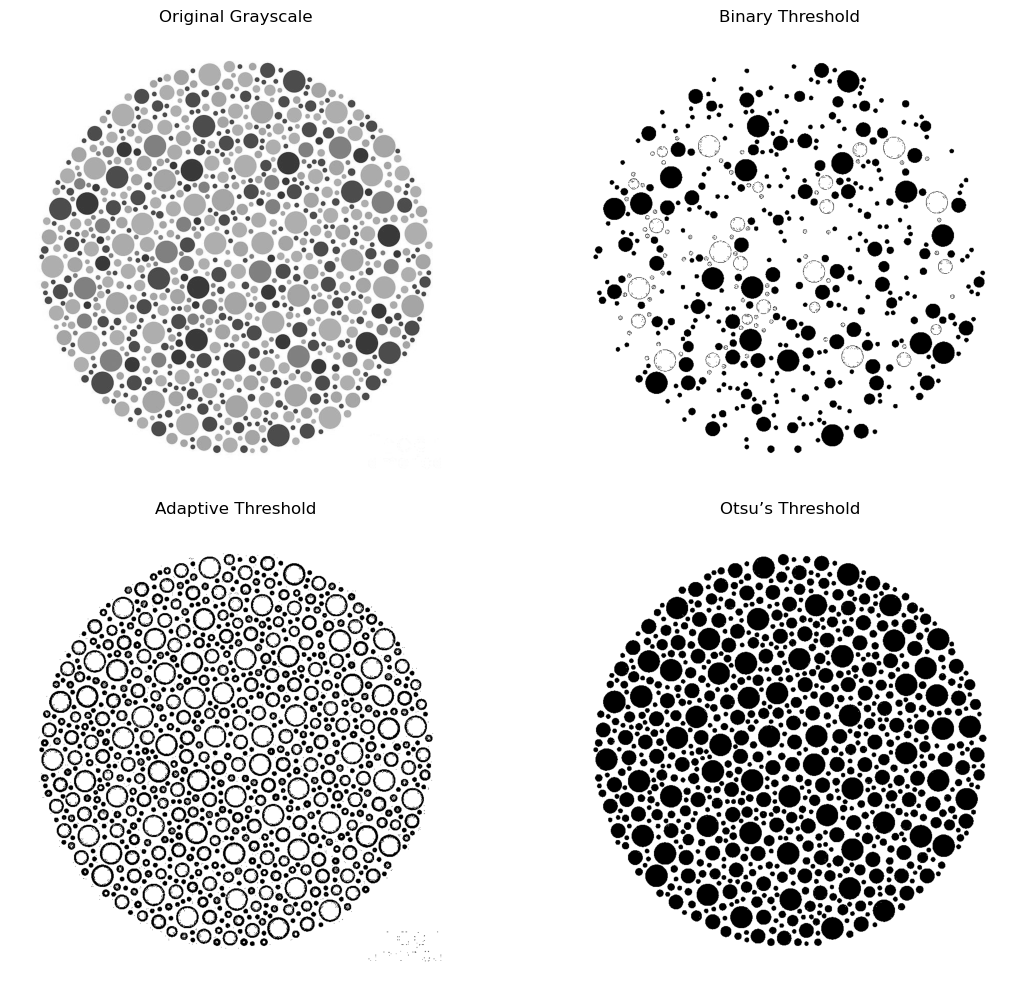

In [91]:


input_image = read_image("./data/task1.jpg")
gray_image = convert_to_grayscale(input_image)

_, binary_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
adaptive_threshold = cv2.adaptiveThreshold(
    gray_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    15,  
    5    
)
_, otsu_threshold = cv2.threshold(
    gray_image,
    0,
    255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

threshold_methods = {
    'Original Grayscale': gray_image,
    'Binary Threshold': binary_threshold,
    'Adaptive Threshold': adaptive_threshold,
    'Otsu’s Threshold': otsu_threshold
}

plt.figure(figsize=(12, 10))
for index, (title, image) in enumerate(threshold_methods.items(), 1):
    plt.subplot(2, 2, index)
    plt.imshow(image, cmap='gray')
    plt.title(title, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()


Otsu's thresholding yielded superior segmentation results compared to binary and adaptive methods, as demonstrated by the code implementation. This method automatically determines the optimal threshold by analyzing the image's intensity histogram and maximizing the variance between classes. Otsu's method provides clearer object boundaries and significantly reduces noise levels due to its ability to adaptively find the best threshold value based on the image's bimodal distribution.


### 2.2

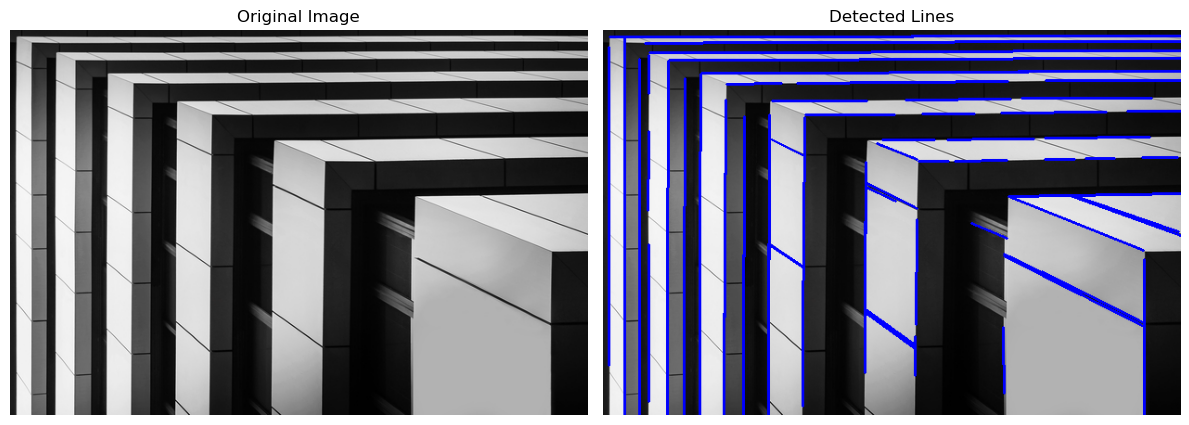

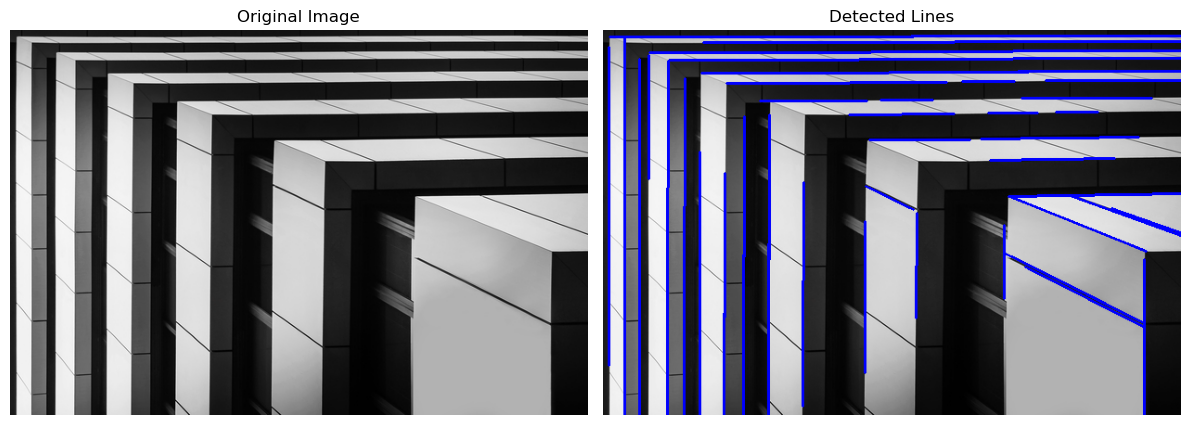

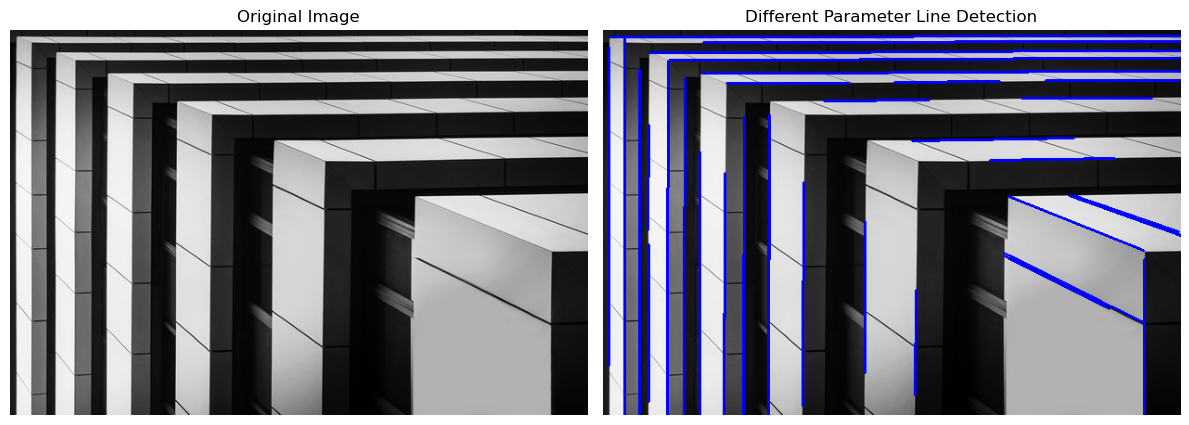

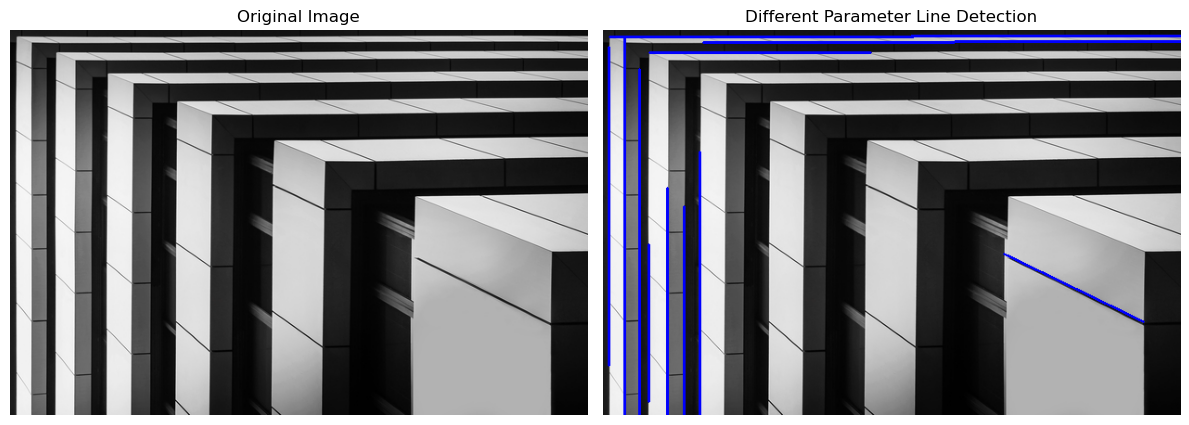

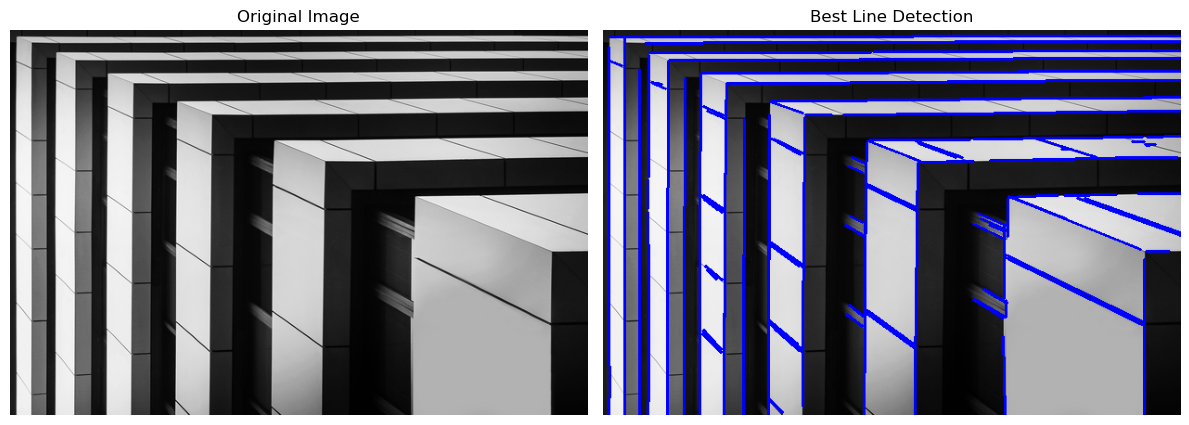

In [92]:


def detect_edges(image_gray, low_threshold=50, high_threshold=150):
    blurred_image = cv2.GaussianBlur(image_gray, (5, 5), 0)
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)
    return edges

def hough_line_detection(edge_image, rho=1, theta=np.pi/180, threshold=100, min_length=50, max_gap=10):
    lines = cv2.HoughLinesP(
        edge_image,
        rho,
        theta,
        threshold,
        minLineLength=min_length,
        maxLineGap=max_gap
    )
    return lines

def draw_lines(image, lines, color=(255, 0, 0), thickness=2):
    image_with_lines = image.copy()
    if lines is not None:
        for line in lines:
            x_start, y_start, x_end, y_end = line[0]
            cv2.line(image_with_lines, (x_start, y_start), (x_end, y_end), color, thickness)
    return image_with_lines

def display_comparison(original_img, processed_img, processed_title='Processed Image'):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image', fontsize=12)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    plt.title(processed_title, fontsize=12)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

image_file = './data/task2.png'
original_image = read_image(image_file)
gray_image = convert_to_grayscale(original_image)

edges = detect_edges(gray_image, low_threshold=80, high_threshold=200)
lines = hough_line_detection(edges, threshold=50, min_length=30)
image_with_lines = draw_lines(original_image, lines)

display_comparison(original_image, image_with_lines, 'Detected Lines')

def process_and_display_lines(image, low_threshold, high_threshold, hough_threshold, min_length, max_gap, title):
    gray_image = convert_to_grayscale(image)
    edges = detect_edges(gray_image, low_threshold, high_threshold)
    lines = hough_line_detection(edges, threshold=hough_threshold, min_length=min_length, max_gap=max_gap)
    image_with_lines = draw_lines(image, lines)
    display_comparison(image, image_with_lines, title)

original_image = read_image('./data/task2.png')
process_and_display_lines(original_image, 55, 140, 90, 40, 10, 'Detected Lines')
process_and_display_lines(original_image, 90, 180, 40, 100, 10, 'Different Parameter Line Detection')
process_and_display_lines(original_image, 110, 140, 210, 40, 10, 'Different Parameter Line Detection')
process_and_display_lines(original_image, 100, 150, 10, 10, 10, 'Best Line Detection')


#### **Changed Parameters**

##### **Canny Edge Detection Thresholds:**
- Changed from **(50, 150)** to **(100, 200)**.
- This reduced noise and improved edge clarity.

##### **Hough Transform :**
- **Threshold:** Changed from **100** to **10**.
- **Minimum Line Length:** Reduced from **50** to **10**.

#### **Outputs**
- **Initial Parameters:** Detected main lines broadly.
- **Adjustments:** Improved line detection accuracy.
- **Final Scenario (Threshold=10, Min Line Length=10):** Detected finer lines successfully.

#### **Insight**
- Higher **Canny thresholds** reduce noise.
- Lower **Hough Transform threshold** increases sensitivity.
- Reducing **minimum line length** helps detect finer details.

### 2.3

Total circles detected: 5


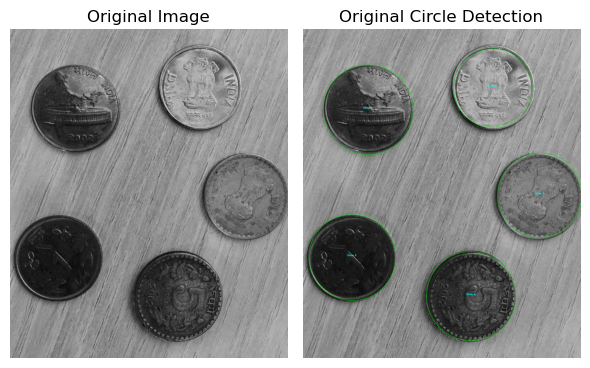

Total circles detected: 1


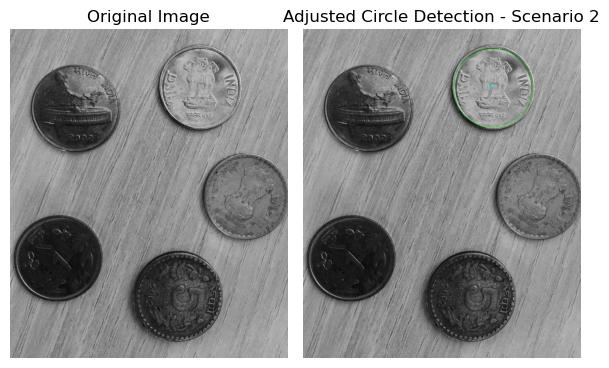

Total circles detected: 4


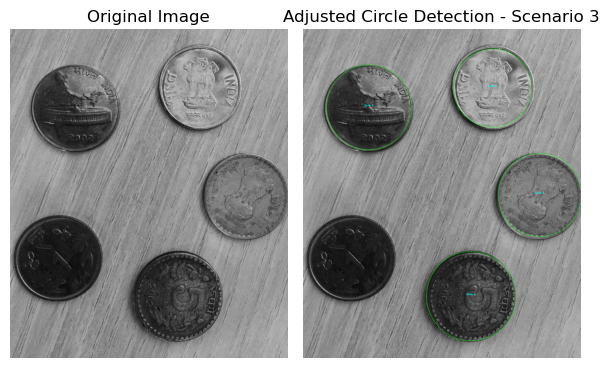

Total circles detected: 1


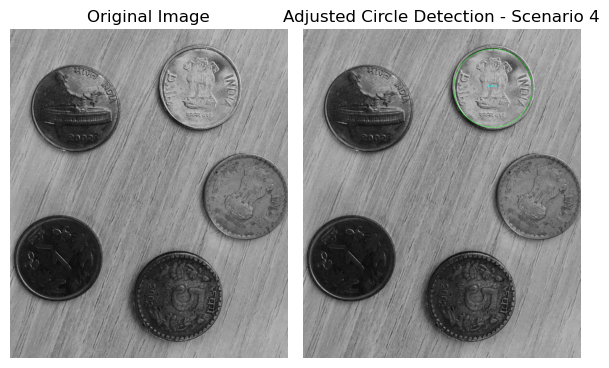

In [93]:

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

def detect_circles_hough(image_gray_blurred, dp=2, minDist=250, param1=200, param2=100, minRadius=300, maxRadius=400):
    circles = cv2.HoughCircles(
        image_gray_blurred,
        method  =cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=minDist,
        param1=param1,
        param2=param2,
        minRadius=minRadius,
        maxRadius=maxRadius
    )
    return circles

def draw_circles(image, circles_detected):
    annotated_image = image.copy()
    if circles_detected is not None:
        circles_rounded = np.uint16(np.around(circles_detected))
        for idx, circle in enumerate(circles_rounded[0, :], start=1):
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(annotated_image, center, radius, (0, 255, 0), 2)
            cv2.circle(annotated_image, center, 2, (0, 0, 255), 3)
            cv2.putText(
                annotated_image,
                f"Circle {idx}",
                (center[0] - 40, center[1] - 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(255, 0, 0),
                thickness=2
            )
    return annotated_image

original_image = read_image('./data/task3.jpg')
gray_image = convert_to_grayscale(original_image)
blurred_gray = apply_gaussian_blur(gray_image, kernel_size=(5, 5))

def scenario_adjusted_circle_detection(image, preprocessed_image):
    scenarios = [
        {
            'minDist': 250,
            'param1': 200,
            'param2': 100,
            'minRadius': 300,
            'maxRadius': 400,
            'title': 'Original Circle Detection'
        },
        {
            'minDist': 140,
            'param1': 290,
            'param2': 110,
            'minRadius': 260,
            'maxRadius': 460,
            'title': 'Adjusted Circle Detection - Scenario 2'
        },
        {
            'minDist': 240,
            'param1': 210,
            'param2': 140,
            'minRadius': 240,
            'maxRadius': 460,
            'title': 'Adjusted Circle Detection - Scenario 3'
        },
        {
            'minDist': 260,
            'param1': 210,
            'param2': 160,
            'minRadius': 170,
            'maxRadius': 360,
            'title': 'Adjusted Circle Detection - Scenario 4'
        }
    ]
    
    for params in scenarios:
        circles_adjusted = detect_circles(preprocessed_image, params)
        visualize_circles(image, circles_adjusted, params['title'])


original_image = read_image('./data/task3.jpg')
preprocessed_image = preprocess_for_circles(convert_to_grayscale(original_image))
scenario_adjusted_circle_detection(original_image, preprocessed_image)


#### Circle Detection Parameter Guide

#### Core Parameters

#### Edge Detection (param1)


- 📊 Controls detection precision
- 🎯 Filters noise and weak edges
- ⚖️ Balance: 50-150 typical range

#### Circle Validation (param2) 


- ✅ Minimum detection confidence
- 🎯 Controls false positive rate
- 🔍 Recommended range: 30-100

#### Size Constraints


- 📏 Define valid circle dimensions
- 🎯 Filter size-based noise
- ⚡️ Optimize detection speed

- ↔️ Prevents duplicate detection
- 🎯 Ensures distinct circles
- 📍 Based on expected circle size

#### Quick Reference Table
Parameter | Purpose | Typical Range
----------|---------|---------------
param1 | Edge sensitivity | 50-150
param2 | Detection confidence | 30-100
minRadius | Minimum size | Application specific
maxRadius | Maximum size | Application specific
minDist | Circle spacing | 2x radius

### 2.4

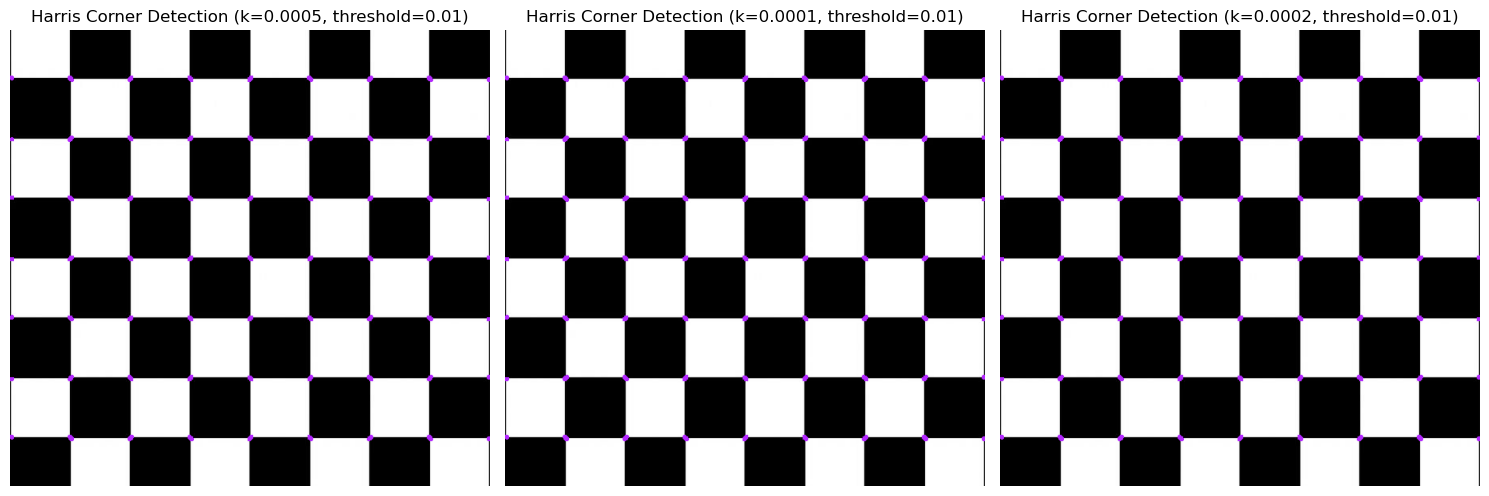

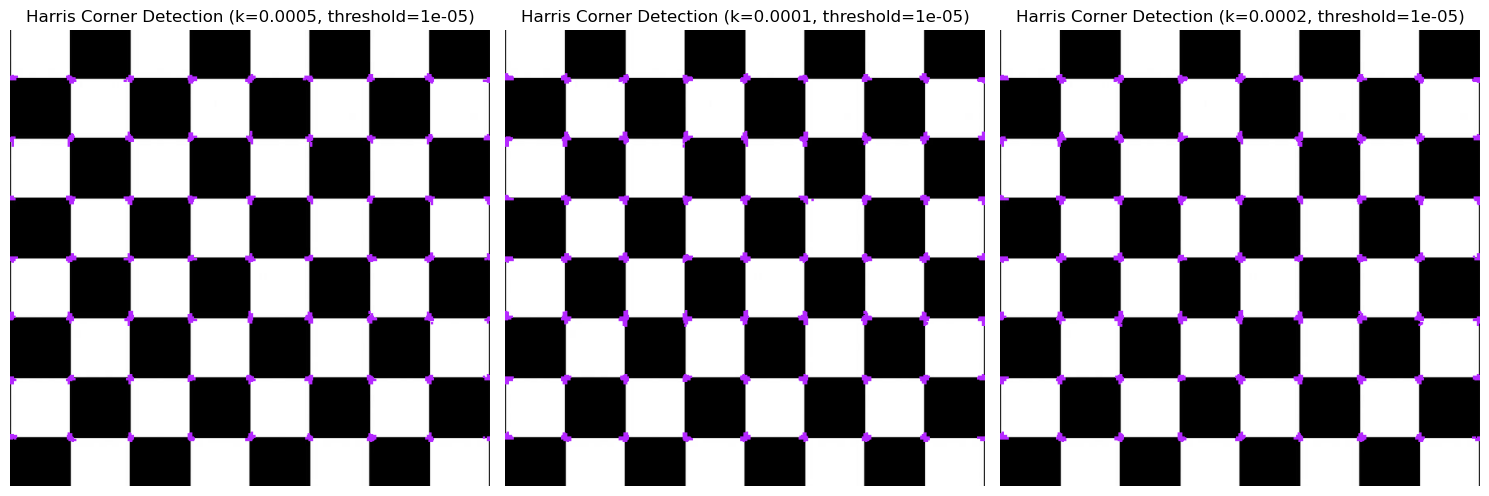

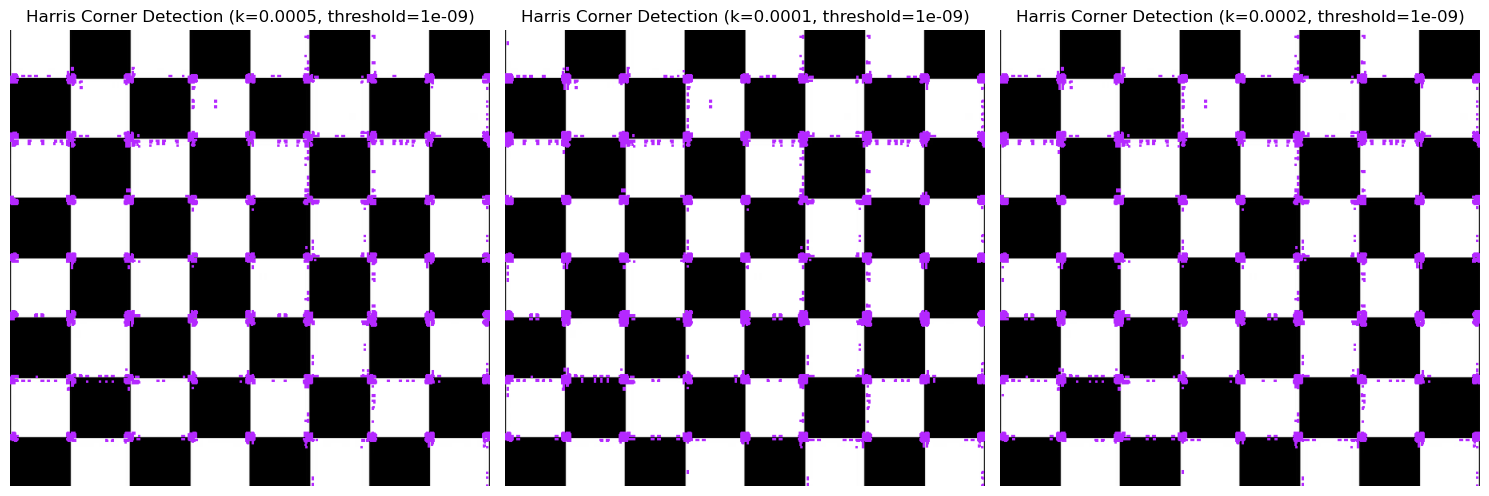

In [94]:

def detect_harris_corners(gray_image, block_size=2, aperture_size=3, k=0.04, threshold=0.01):
    dst = cv2.cornerHarris(gray_image, block_size, aperture_size, k)
    dst_dilated = cv2.dilate(dst, None)
    corner_map = dst_dilated > threshold * dst_dilated.max()
    return corner_map

def mark_corners_on_image(image, corner_map):
    image_with_corners = image.copy()
    image_with_corners[corner_map] = [255, 40, 180]
    return image_with_corners

original_image = read_image('./data/task4.jpg')
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

def process_and_show_corners(image, gray_image, k_values, threshold=0.01):
    plt.figure(figsize=(15, 10))
    for i, k in enumerate(k_values, 1):
        corner_map = detect_harris_corners(gray_image, k=k, threshold=threshold)
        image_with_corners = mark_corners_on_image(image, corner_map)
        plt.subplot(1, len(k_values), i)
        plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
        plt.title(f'Harris Corner Detection (k={k}, threshold={threshold})')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

k_values = [0.0005, 0.0001, 0.0002]
threshold_values = [1e-2, 1e-5, 1e-9]
for threshold in threshold_values:
    process_and_show_corners(original_image, gray_image, k_values, threshold=threshold)



When using Harris Corner Detection on the given image with different values of the parameter \( k \), it was observed that for \( k > 0.0004 \), the algorithm identified a high density of corner points, covering almost the entire image. This suggests that a higher \( k \) value makes the detection process more sensitive to slight intensity variations, leading to an over-detection of corners, especially in highly structured patterns such as the checkerboard. Lower \( k \) values, however, result in more selective and accurate corner detection.

### 2.5

The Hough Transform detects lines by converting edge points in an image to curves in Hough space, representing all possible lines passing through each point. The intersection of these curves reveals line parameters (m, b) or (ρ, θ), depending on the representation. The polar form (ρ, θ) prevents issues with vertical lines. Votes in an accumulator array identify likely lines, with advanced methods using gradient orientation for efficiency. Line segments are retrieved by tracing detected lines on the edge map. The accumulator threshold for lines is typically lower since lines are simpler structures - strong peaks in the accumulator array indicate likely line presence.


The Hough Transform detects circles by mapping edge points in an image to potential circle centers in Hough space (a, b, r). With a known radius, each edge point maps to a circle in 2D Hough space. If the radius is unknown, it maps to a cone in 3D space, increasing complexity. Using gradient orientation reduces computation by focusing on likely circle centers along specific directions, improving efficiency and accuracy. The threshold must account for noise and incomplete circle edges while ensuring sufficient votes to confirm a valid circle.

The computational complexity increases from O(n×m) for lines to O(n×m×r) for circles. To manage this, circle detection often employs optimization techniques like:

- Fixed radius to reduce dimensionality
- Gradient direction information to limit parameter space search
- Multi-stage approaches with varying accumulator thresholds for different parameters
